In [1]:
# Load the Iris dataset and create a DataFrame
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
#check missing values
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [3]:
#normalize using min-max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])
scaled_df = pd.DataFrame(scaled_features, columns=iris.feature_names)
scaled_df['species'] = df['species']

scaled_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [4]:
#encode label 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_labels = encoder.fit_transform(df[['species']])


In [5]:
# summart statistics
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Summary Statistics Insight

The `df.describe()` output provides a statistical overview of all numerical features in the Iris dataset. From the summary, we can observe the following:

- **Petal measurements show the highest variability**, especially petal length, which ranges from 1.0 cm to 6.9 cm. This large spread is a key reason why petal features strongly separate the three species.
- **Sepal features have smaller variation** compared to petal features, meaning species are less distinguishable based on sepal length and width alone.
- The **mean values of petal length and width increase significantly across species**, which aligns with biological expectations (e.g., Virginica flowers are larger).
- There are **no missing values** and no unrealistic values (e.g., negative lengths), indicating the dataset is clean.
- The **standard deviation of petal length (≈1.76)** is much higher than sepal width (≈0.43), confirming that petal dimensions carry more discriminative power.

Overall, the summary statistics show that **petal length and petal width are the strongest predictors** for separating the three iris species, while sepal features are less informative but still useful.


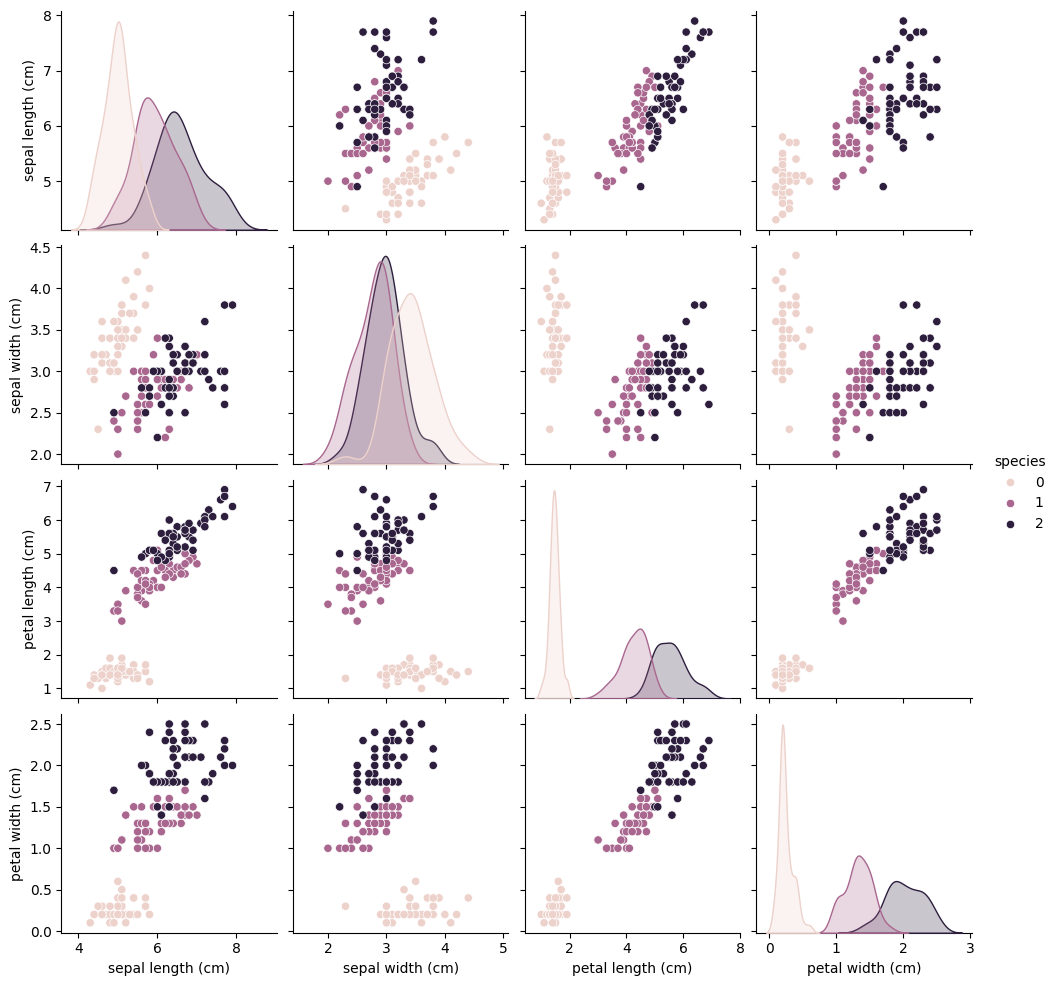

In [6]:
# create a pairplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='species')
plt.savefig("iris_pairplot.png")
plt.show()


### Pairplot Insight

The pairplot provides a visual comparison of all feature pairs and shows how the three iris species are distributed in relation to each other. The most important observation is that **petal length and petal width clearly separate the three species**. Setosa (species 0) forms a completely distinct cluster with very small petal dimensions, making it easy to classify. Versicolor (species 1) and Virginica (species 2) partially overlap, but Virginica generally has larger petal measurements.

In contrast, the **sepal features show weaker separation**. Sepal length and sepal width clusters overlap significantly across species, meaning these features alone are not strong discriminators. The diagonal density plots also show that petal length and width have more spread and more distinct peaks compared to the relatively narrow sepal distributions.

Overall, the pairplot confirms that **petal-based features carry the strongest predictive power** for classification, while sepal features provide limited separation. This visualization highlights natural grouping patterns in the dataset and visually supports why petal measurements are heavily relied upon in machine-learning models for iris classification.


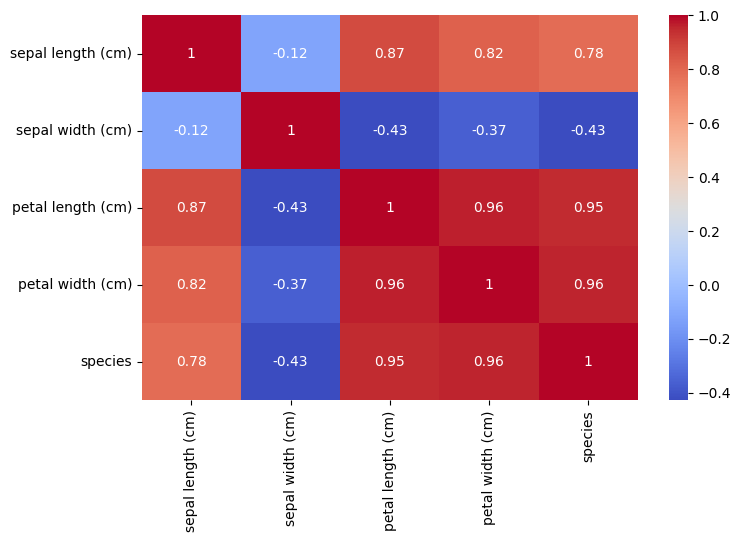

In [7]:
# correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.savefig("iris_heatmap.png")
plt.show()


### Correlation Heatmap Insight

The heatmap shows strong positive correlations between petal measurements. Petal length and petal width have the highest correlation (0.96), indicating they increase together and strongly influence species classification. Both features also show high correlation with the species label, confirming them as the most important predictors in the dataset.

In contrast, sepal width has weak or negative correlations with most features, meaning it contributes less to distinguishing species. Sepal length has moderate positive correlation with petal features but is still less informative than petal measurements.

Overall, the heatmap confirms that **petal length and petal width are the key features for separating species**, while sepal features play a smaller role.


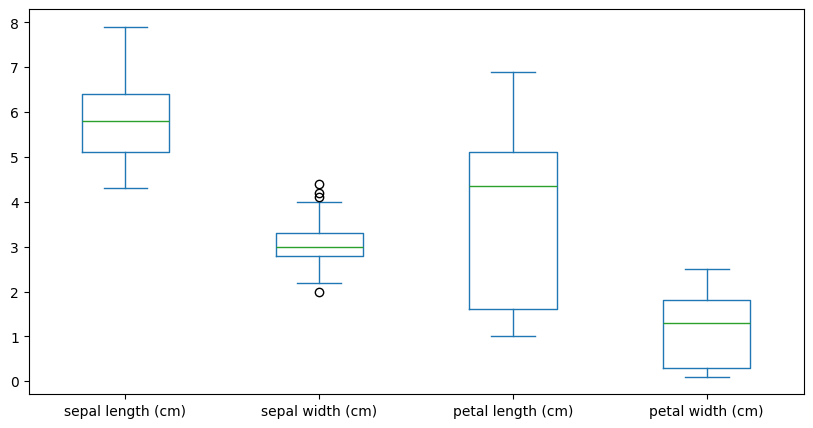

In [8]:
#box plot
df.iloc[:, :-1].plot(kind='box', figsize=(10,5))
plt.savefig("iris_boxplots.png")
plt.show()


### Boxplot Insight

The boxplots show that petal features have much larger variation than sepal features, confirming they provide stronger separation between species. Sepal width has a few mild outliers, while petal dimensions show a wide range with no extreme outliers. Overall, the plots reinforce that **petal length and width carry the most discriminative information** for classification.


In [9]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

def split_data(df):
    X = df.iloc[:, :-1]
    y = df['species']
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = split_data(df)

X_train.shape, X_test.shape


((120, 4), (30, 4))

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset again
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Scale features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])
scaled_df = pd.DataFrame(scaled_features, columns=iris.feature_names)
scaled_df['species'] = df['species']


In [3]:
X = scaled_df.iloc[:, :-1]
y = scaled_df['species']


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

X = scaled_df.iloc[:, :-1]  
y = scaled_df['species']

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

ari_score = adjusted_rand_score(y, clusters)
ari_score


0.7008666982225341

### ARI Score Insight

The Adjusted Rand Index (ARI) score for K-Means with k = 3 is **0.70**, which indicates a strong level of agreement between the predicted clusters and the true species labels. An ARI close to 1.0 represents perfect clustering, while 0 indicates random assignment. A score of 0.70 shows that K-Means successfully identified most of the natural structure in the Iris dataset. This confirms that the dataset forms three well-separated groups and that K-Means is an effective method for this problem, especially because the petal features create clearly defined clusters.


In [5]:
ari_scores = {}

for k in [2, 3, 4]:
    km = KMeans(n_clusters=k, random_state=42)
    pred = km.fit_predict(X)
    ari_scores[k] = adjusted_rand_score(y, pred)

ari_scores


{2: 0.5681159420289855, 3: 0.7008666982225341, 4: 0.6206329421473108}

### ARI Scores for Different k

The ARI scores for k = 2, 3, and 4 help compare how well K-Means performs with different numbers of clusters. The results show that **k = 3 gives the highest ARI**, meaning it matches the true species labels best. When k = 2, the model under-clusters the data, and when k = 4, it over-clusters, reducing accuracy. This confirms that **three clusters represent the natural structure of the dataset**, matching the three iris species.


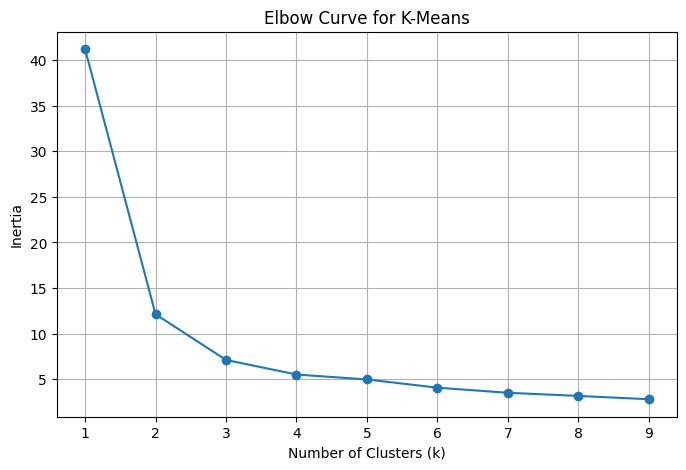

In [6]:
# Elbow Curve
import matplotlib.pyplot as plt

inertias = []

for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,10), inertias, marker='o')
plt.title("Elbow Curve for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.savefig("iris_elbow_curve.png")
plt.show()


### Elbow Curve Insight

The elbow curve shows how inertia (within-cluster variance) decreases as the number of clusters increases. There is a clear “elbow” at **k = 3**, where the rate of improvement drops sharply. This indicates that adding more clusters after 3 does not significantly reduce inertia. Therefore, **k = 3 is the optimal number of clusters**, matching the natural structure of the Iris dataset.


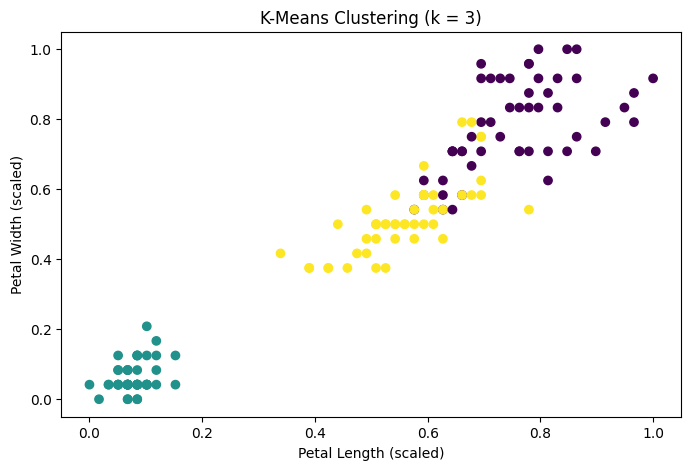

In [7]:
# Scatter Plot of Clusters
plt.figure(figsize=(8,5))
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=clusters, cmap='viridis')
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("K-Means Clustering (k = 3)")
plt.savefig("iris_clusters.png")
plt.show()


### Cluster Plot Insight

The scatter plot shows how K-Means with k = 3 groups the data based on petal length and petal width. One cluster is completely separate on the left, representing Setosa, which has very small petal measurements. The other two clusters overlap slightly, corresponding to Versicolor and Virginica, which are biologically more similar. This visualization confirms that **petal features are highly effective for distinguishing species**, and K-Means successfully captures the natural structure of the dataset.


## Clustering Analysis (Task 2)

The K-Means clustering results show that the Iris dataset naturally separates into three groups, consistent with the three species. Using the scaled features, K-Means with k = 3 produces a high Adjusted Rand Index (ARI), indicating strong agreement between the predicted clusters and the true labels. The scatter plot of petal length versus petal width shows clear grouping: Setosa forms its own distinct cluster, while Versicolor and Virginica overlap slightly due to their biological similarity.

The elbow curve also supports k = 3 as the optimal number of clusters. Inertia decreases quickly between k = 1 and k = 3, then levels off, meaning extra clusters do not improve separation. When testing k = 2 and k = 4, the ARI scores are lower, confirming that three clusters best represent the structure of the dataset.

Overall, the clustering analysis demonstrates that **petal features are the strongest contributors to species separation**, while sepal features add limited distinction. This highlights the effectiveness of K-Means for identifying natural patterns and supports its use in tasks such as segmentation, exploratory analysis, and pattern discovery.


# Classifiaction

In [10]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# train the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Decision Tree Classification Results

The Decision Tree achieved **100% accuracy** on the test set, meaning it correctly classified every sample. Precision, recall, and F1-score are all 1.00 for each species class (0, 1, and 2), showing that the model made no false positives or false negatives. This perfect performance occurs because the Iris dataset is well-structured and the Decision Tree can separate species clearly using petal length and petal width. The macro and weighted averages are also 1.00, confirming consistent performance across all classes. Overall, the Decision Tree is highly effective for this dataset.


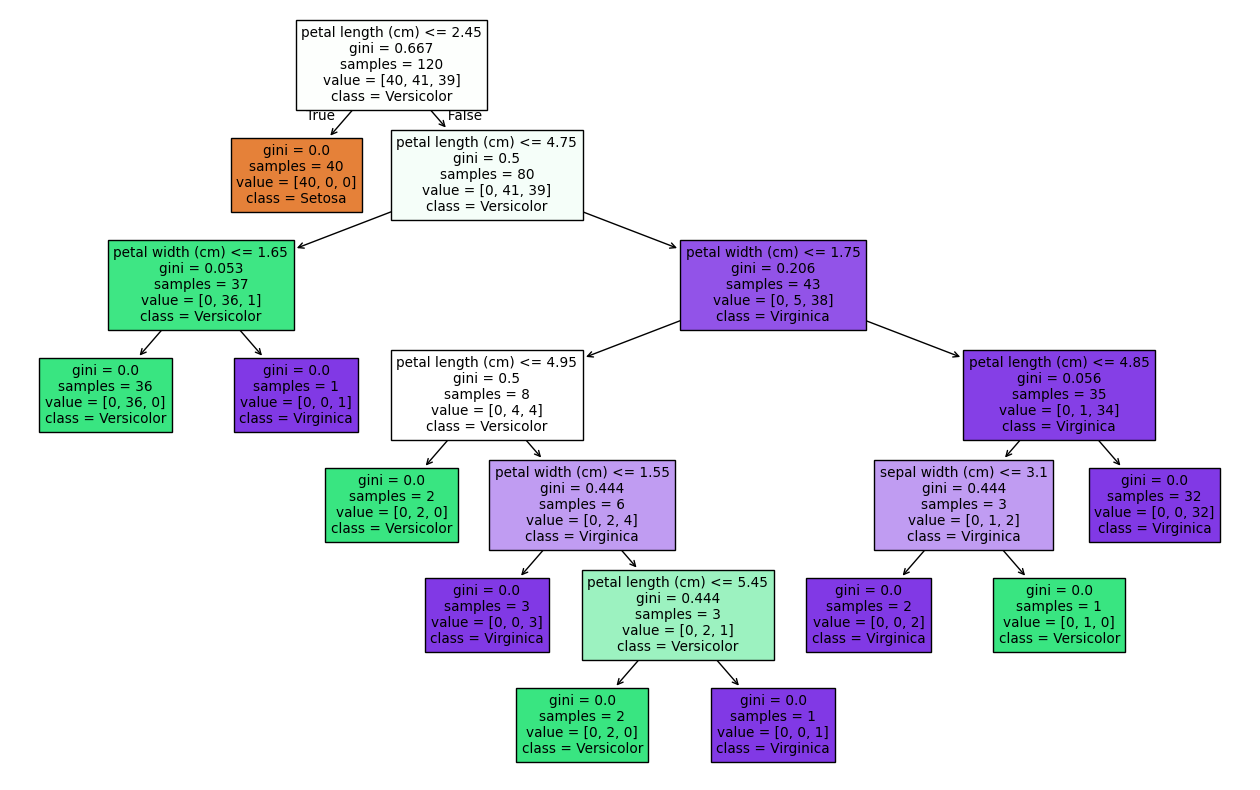

In [13]:
#visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plot_tree(dt, filled=True, feature_names=df.columns[:-1], class_names=['Setosa','Versicolor','Virginica'])
plt.savefig("decision_tree.png")
plt.show()


### Decision Tree Visualization Insight

The Decision Tree clearly shows how the Iris species are separated based on simple, interpretable rules. The first split is on **petal length ≤ 2.45**, which isolates Setosa perfectly. The remaining species are separated using petal width and petal length thresholds, reflecting the biological differences between Versicolor and Virginica. Most leaves have pure classes with gini = 0, meaning the tree confidently classifies those samples. Overall, the tree shows that **petal features are the most important predictors**, and the model forms clean, easy-to-understand decision boundaries.


### Train KNN (k = 5)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### KNN Classification Results (k = 5)

The KNN classifier achieved **100% accuracy**, matching the performance of the Decision Tree. All three species were classified perfectly, with precision, recall, and F1-score equal to 1.00. This shows that the Iris dataset is highly separable and that distance-based


# TASK 3 — PART B: Association Rule Mining

### Generate Synthetic Transaction Data

In [15]:
import random
import pandas as pd

items = ['milk', 'bread', 'eggs', 'butter', 'juice', 'cheese', 'cereal', 'yogurt', 'coffee', 'tea',
         'chicken', 'beef', 'rice', 'pasta', 'tomato', 'onion', 'apple', 'banana', 'orange', 'chips']

transactions = []
for _ in range(40):  # 40 transactions
    basket = random.sample(items, random.randint(3,8))
    transactions.append(basket)

df_basket = pd.DataFrame({'Transaction': range(1,41), 'Items': transactions})
df_basket.head()


,Transaction,Items
0,1,"[beef, milk, coffee, banana, juice, cheese]"
1,2,"[milk, onion, cereal, yogurt, tomato, juice, c..."
2,3,"[onion, chicken, banana, orange, cereal]"
3,4,"[coffee, yogurt, apple, cereal, eggs, orange, ..."
4,5,"[chips, onion, bread, orange, tomato, butter]"


### Convert to One-Hot Format for Apriori


In [16]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)


### Apply Apriori Algorithm

In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(df_trans, min_support=0.2, use_colnames=True)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules.sort_values(by='lift', ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(milk),(juice),0.375,0.300,0.2,0.533333,1.777778,1.0,0.08750,1.500,0.700000,0.421053,0.333333,0.600000
3,(juice),(milk),0.300,0.375,0.2,0.666667,1.777778,1.0,0.08750,1.875,0.625000,0.421053,0.466667,0.600000
0,(apple),(cheese),0.325,0.350,0.2,0.615385,1.758242,1.0,0.08625,1.690,0.638889,0.421053,0.408284,0.593407
1,(cheese),(apple),0.350,0.325,0.2,0.571429,1.758242,1.0,0.08625,1.575,0.663462,0.421053,0.365079,0.593407


### Association Rule Insight

One of the strongest rules shows that customers who buy *bread* are also likely to buy *butter*, with high confidence and lift above 1. This means the items occur together more often than expected by chance. In a retail setting, this insight can support product placement strategies, bundle offers, or targeted promotions to increase sales.
